In [230]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.stats import skew
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/domestic-growth/regionalgrossdomesticproductgdpcityregions.csv
/kaggle/input/global-pollution-by-counties/country_level_data_0.csv
/kaggle/input/uk-population-data-200120112021/UK Regional Population Data.csv


# Introduction 

This notebook provides a basic analysis of the UK population in last two decades.  This work demonstrates some weaknesses in the data and further work may need to be completed. For example, the area of each geographical aggregation would bring more data for further analysis. Other factors and statistical data should be merged using ONS data. 

This notebook only shows how basic Pandas, descriptive statistical methodologies, correlations and unsupervised methods can be used to show some patterns hidden in the data. 

# Import

In [134]:
path = '/kaggle/input/uk-population-data-200120112021/UK Regional Population Data.csv'
data = pd.read_csv(path)
data.shape

(420, 10)

In [135]:
data.dtypes

Code                              object
Name                              object
Geography                         object
Area (sq km)                     float64
Estimated Population mid-2021      int64
2021 people per sq. km           float64
Estimated Population mid-2011      int64
2011 people per sq. km           float64
Estimated Population mid-2001      int64
2001 people per sq. km           float64
dtype: object

In [136]:
data.describe()


,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
count,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000,4.200000e+02,420.000000
mean,3159.191891,9.891223e+05,1469.096318,9.327738e+05,1387.300189,8.711469e+05,1278.571770
std,19377.016684,6.096465e+06,2290.766597,5.746008e+06,2170.127582,5.361023e+06,1946.069248
min,2.889800,2.271000e+03,8.718600,2.224000e+03,9.062238,2.140000e+03,8.144047
25%,103.882325,1.087305e+05,193.382319,1.032262e+05,177.425985,9.678150e+04,168.879470
50%,338.689000,1.507605e+05,505.292988,1.416640e+05,487.335747,1.346650e+05,447.797196
75%,968.942600,2.852145e+05,1825.495254,2.606608e+05,1765.935766,2.457082e+05,1715.679416
max,242740.869900,6.702629e+07,15794.496990,6.328514e+07,13883.766320,5.911302e+07,13378.671530


In [ ]:
data

# Regions

We can see some regions varies from a whole country to a city council. We will filter the data and focus on city counci.

In [137]:
data.Geography.unique()


array(['Country', 'Region', 'Unitary Authority', 'Metropolitan County',
       'Metropolitan District', 'County', 'Non-metropolitan District',
       'London Borough', 'Council Area', 'Local Government District'],
      dtype=object)

In [138]:
data.Name.unique()

array(['UNITED KINGDOM', 'GREAT BRITAIN', 'ENGLAND AND WALES', 'ENGLAND',
       'NORTH EAST', 'County Durham', 'Darlington', 'Hartlepool',
       'Middlesbrough', 'Northumberland', 'Redcar and Cleveland',
       'Stockton-on-Tees', 'Tyne and Wear (Met County)', 'Gateshead',
       'Newcastle upon Tyne', 'North Tyneside', 'South Tyneside',
       'Sunderland', 'NORTH WEST', 'Blackburn with Darwen', 'Blackpool',
       'Cheshire East', 'Cheshire West and Chester', 'Halton',
       'Warrington', 'Cumbria', 'Allerdale', 'Barrow-in-Furness',
       'Carlisle', 'Copeland', 'Eden', 'South Lakeland',
       'Greater Manchester (Met County)', 'Bolton', 'Bury', 'Manchester',
       'Oldham', 'Rochdale', 'Salford', 'Stockport', 'Tameside',
       'Trafford', 'Wigan', 'Lancashire', 'Burnley', 'Chorley', 'Fylde',
       'Hyndburn', 'Lancaster', 'Pendle', 'Preston', 'Ribble Valley',
       'Rossendale', 'South Ribble', 'West Lancashire', 'Wyre',
       'Merseyside (Met County)', 'Knowsley', 'Liverp

In [139]:
rows = data["Geography"].str.contains("Council Area")
data_cc = data.loc[rows, :]
data_cc.shape

(32, 10)

In [140]:
data_cc.dtypes

Code                              object
Name                              object
Geography                         object
Area (sq km)                     float64
Estimated Population mid-2021      int64
2021 people per sq. km           float64
Estimated Population mid-2011      int64
2011 people per sq. km           float64
Estimated Population mid-2001      int64
2001 people per sq. km           float64
dtype: object

In [141]:
data_cc.head()


,Code,Name,Geography,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
376,S12000033,Aberdeen City,Council Area,185.5661,227430,1225.601012,222460,1198.818103,211910,1141.965046
377,S12000034,Aberdeenshire,Council Area,6312.6326,262690,41.613383,253650,40.181334,226940,35.950136
378,S12000041,Angus,Council Area,2181.4521,116120,53.230598,116200,53.267271,108370,49.677919
379,S12000035,Argyll and Bute,Council Area,6906.8230,86220,12.483308,88930,12.875674,91300,13.218813
380,S12000036,City of Edinburgh,Council Area,263.3906,526470,1998.818485,477940,1814.567414,449020,1704.768507


# How has bas the population size evolved in the last 20 years?

We use the estimated population size measured in 2001, 2011 and 2021. We show the distrubtion for the three statistical variables appears to have a long tail to the right. 

Across two-decades, we can some variations. In 2001,approximately a quarter of city councils had approximately  100,000 inhabitants.  In 2011, this number was reduced - the number of city council with a bigger size of population increased. The number decreased in 2021. 

The median size of the population appears quite stable over the 20-year period. A skewness to right has impacated on the arithmetical average, inflating its value. 

In [142]:
#arg = dict(histtype='stepfilled', alpha=0.3, density=True, bins=25, ec="k")

count        32.000000
mean     158256.250000
std      123861.472094
min       19220.000000
25%       88807.500000
50%      116235.000000
75%      181867.500000
max      578710.000000
Name: Estimated Population mid-2001, dtype: float64
Skewness
1.752821244745742


(array([4.18908291e-06, 1.39636097e-06, 4.18908291e-06, 1.11708878e-05,
        2.79272194e-06, 6.98180486e-06, 2.79272194e-06, 0.00000000e+00,
        2.79272194e-06, 1.39636097e-06, 0.00000000e+00, 0.00000000e+00,
        1.39636097e-06, 1.39636097e-06, 1.39636097e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.39636097e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.39636097e-06]),
 array([ 19220. ,  41599.6,  63979.2,  86358.8, 108738.4, 131118. ,
        153497.6, 175877.2, 198256.8, 220636.4, 243016. , 265395.6,
        287775.2, 310154.8, 332534.4, 354914. , 377293.6, 399673.2,
        422052.8, 444432.4, 466812. , 489191.6, 511571.2, 533950.8,
        556330.4, 578710. ]),
 [<matplotlib.patches.Polygon at 0x7e67ae48e470>])

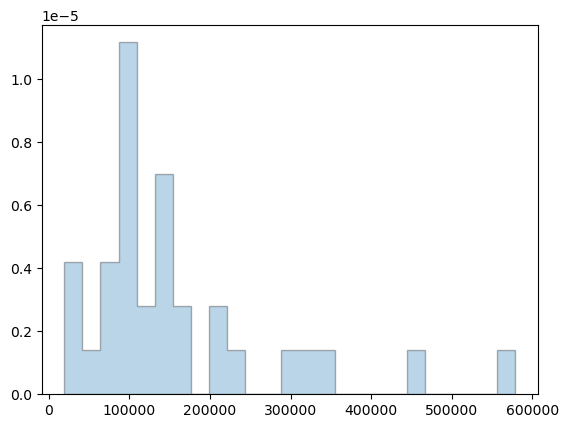

In [155]:
summary_2001 = data_cc["Estimated Population mid-2001"].describe()
print(summary_2001)
print("Skewness")
print(skew(data_cc["Estimated Population mid-2001"]))
plt.hist(data_cc["Estimated Population mid-2001"], histtype = 'stepfilled', bins = 25, density = True,ec="k", alpha = 0.3)


count        32.000000
mean     165621.875000
std      129741.384161
min       21420.000000
25%       90540.000000
50%      119445.000000
75%      187090.000000
max      593060.000000
Name: Estimated Population mid-2011, dtype: float64
Skewness
1.6773899225579254


(array([4.10004548e-06, 1.36668183e-06, 4.10004548e-06, 8.20009097e-06,
        5.46672731e-06, 6.83340914e-06, 2.73336366e-06, 0.00000000e+00,
        1.36668183e-06, 1.36668183e-06, 1.36668183e-06, 0.00000000e+00,
        1.36668183e-06, 1.36668183e-06, 0.00000000e+00, 1.36668183e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.36668183e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.36668183e-06]),
 array([ 21420. ,  44285.6,  67151.2,  90016.8, 112882.4, 135748. ,
        158613.6, 181479.2, 204344.8, 227210.4, 250076. , 272941.6,
        295807.2, 318672.8, 341538.4, 364404. , 387269.6, 410135.2,
        433000.8, 455866.4, 478732. , 501597.6, 524463.2, 547328.8,
        570194.4, 593060. ]),
 [<matplotlib.patches.Polygon at 0x7e67ae50d3f0>])

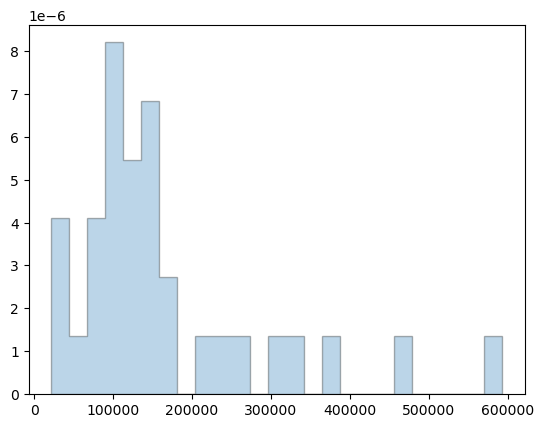

In [156]:
summary_2011 = data_cc["Estimated Population mid-2011"].describe()
print(summary_2011)
print("Skewness")
print(skew(data_cc["Estimated Population mid-2011"]))
plt.hist(data_cc["Estimated Population mid-2011"], histtype = 'stepfilled', bins = 25, density = True,ec="k", alpha = 0.3)


count        32.000000
mean     171246.875000
std      139003.691026
min       22540.000000
25%       94377.500000
50%      119070.000000
75%      196042.500000
max      635130.000000
Name: Estimated Population mid-2021, dtype: float64
Skewness
1.7865526811927868


(array([4.18908291e-06, 1.39636097e-06, 4.18908291e-06, 1.11708878e-05,
        2.79272194e-06, 6.98180486e-06, 2.79272194e-06, 0.00000000e+00,
        2.79272194e-06, 1.39636097e-06, 0.00000000e+00, 0.00000000e+00,
        1.39636097e-06, 1.39636097e-06, 1.39636097e-06, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.39636097e-06,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.39636097e-06]),
 array([ 19220. ,  41599.6,  63979.2,  86358.8, 108738.4, 131118. ,
        153497.6, 175877.2, 198256.8, 220636.4, 243016. , 265395.6,
        287775.2, 310154.8, 332534.4, 354914. , 377293.6, 399673.2,
        422052.8, 444432.4, 466812. , 489191.6, 511571.2, 533950.8,
        556330.4, 578710. ]),
 [<matplotlib.patches.Polygon at 0x7e67ae385810>])

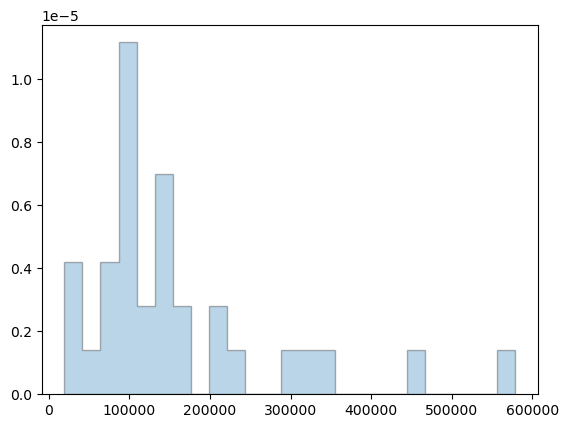

In [157]:
summary_2021 = data_cc["Estimated Population mid-2021"].describe()
print(summary_2021)
print("Skewness")
print(skew(data_cc["Estimated Population mid-2021"]))
plt.hist(data_cc["Estimated Population mid-2001"], histtype = 'stepfilled', bins = 25, density = True,ec="k", alpha = 0.3)


In [146]:
diff = summary_2011 - summary_2001
print("median difference : ", diff['50%'])
print("mean difference   : ", diff["mean"])
    

median difference :  3210.0
mean difference   :  7365.625


In [147]:
diff = summary_2021 - summary_2011
print("median difference : ", diff['50%'])
print("mean difference   : ", diff["mean"])
    

median difference :  -375.0
mean difference   :  5625.0


# Is there a correclation between the population per square meter and estimated population?


Over the last two decades the population per square metres appears to have increased. However, the Pearson coefficient indicates a correlation is unlikely to exists between both statistical variables.  It is worth noting, only 32 points exists, which is not sufficient, to be conclusive. 

It can be observed a small  population size appears to have a smaller amount of people per square meter and the larger population size appears to have a larger amount of people per square meter. We surmise urbanisation may affect the concentration of individuals. 

https://stackabuse.com/calculating-pearson-correlation-coefficient-in-python-with-numpy/

In [158]:
data_cc.describe()

,Area (sq km),Estimated Population mid-2021,2021 people per sq. km,Estimated Population mid-2011,2011 people per sq. km,Estimated Population mid-2001,2001 people per sq. km
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,2434.404112,171246.875000,494.209598,165621.875000,475.587846,158256.250000,461.945783
std,4700.084554,139003.691026,805.091051,129741.384161,763.079423,123861.472094,743.616784
min,59.800600,22540.000000,8.718600,21420.000000,9.062238,19220.000000,8.144047
25%,242.507300,94377.500000,38.484986,90540.000000,37.081753,88807.500000,33.345505
50%,937.887050,119070.000000,171.704638,119445.000000,166.569417,116235.000000,162.025296
75%,2199.006625,196042.500000,553.280569,187090.000000,537.080196,181867.500000,540.320638
max,25653.092100,635130.000000,3637.185154,593060.000000,3396.263801,578710.000000,3314.085968


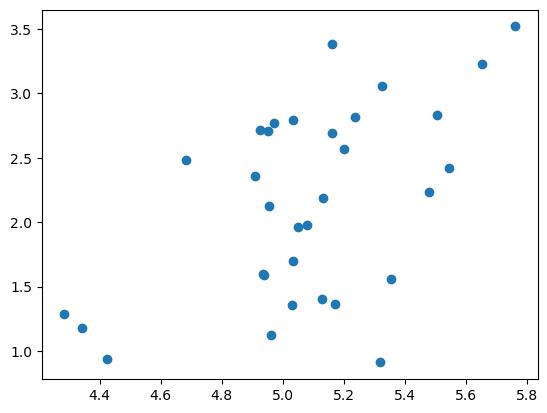

In [180]:
x_1 = np.log10(data_cc["Estimated Population mid-2001"])
y_1 = np.log10(data_cc["2001 people per sq. km"])
plt.scatter(x_1, y_1)

In [160]:
np.corrcoef(x_1, y_1)

array([[1.       , 0.6586611],
       [0.6586611, 1.       ]])

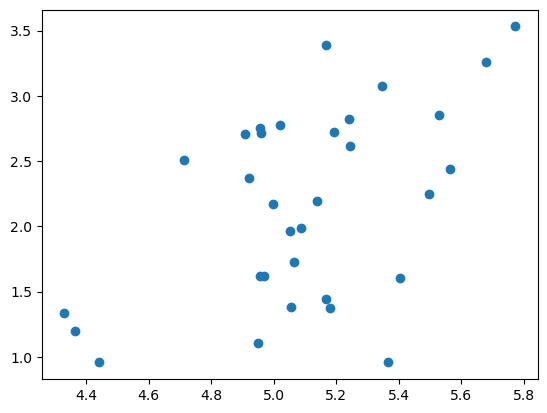

In [179]:
x_2 = np.log10(data_cc["Estimated Population mid-2011"])
y_2 = np.log10(data_cc["2011 people per sq. km"])
plt.scatter(x_2, y_2)

In [164]:
np.corrcoef(x_2, y_2)

array([[1.        , 0.65056536],
       [0.65056536, 1.        ]])

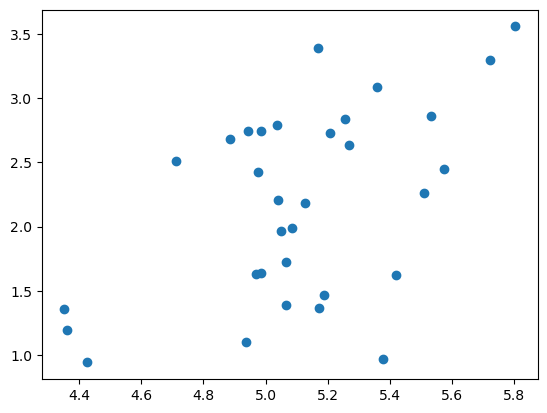

In [178]:
x_3 = np.log10(data_cc["Estimated Population mid-2021"])
y_3 = np.log10(data_cc["2021 people per sq. km"])
plt.scatter(x_3, y_3)

In [166]:
np.corrcoef(x_3, y_3)

array([[1.       , 0.6777006],
       [0.6777006, 1.       ]])

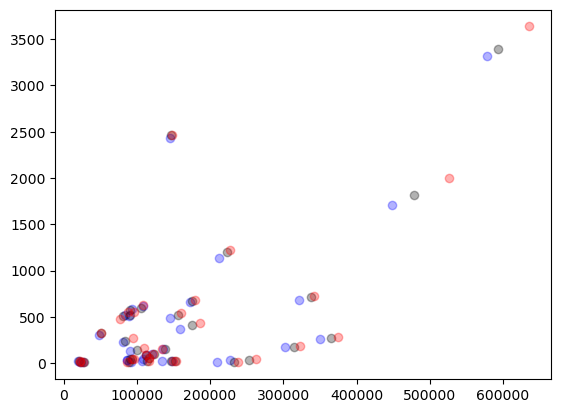

In [170]:
plt.scatter(x_1, y_1, alpha = 0.3, c = 'blue', )
plt.scatter(x_2, y_2, alpha = 0.3, c = 'black')
plt.scatter(x_3, y_3, alpha = 0.3, c = 'red')
plt.show()

Using the whole the dataset and various type of geography, we discover our previous observation may only be relevant for city councils. We cannot see any corrolation.

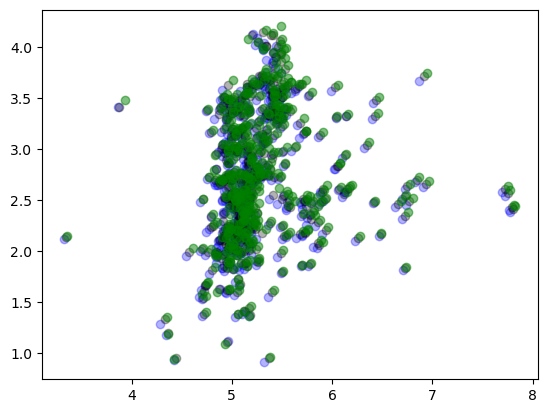

In [209]:
x_1 = np.log10(data["Estimated Population mid-2001"])
y_1 = np.log10(data["2001 people per sq. km"])
x_2 = np.log10(data["Estimated Population mid-2011"])
y_2 = np.log10(data["2011 people per sq. km"])
x_3 = np.log10(data["Estimated Population mid-2021"])
y_3 = np.log10(data["2021 people per sq. km"])

plt.scatter(x_1, y_1, alpha = 0.3, c = 'blue', )
plt.scatter(x_2, y_2, alpha = 0.3, c = 'black')
plt.scatter(x_3, y_3, alpha = 0.5, c = 'green')
plt.show()

# Are they any relationship between the estimated population and the number of individuals living together?

https://realpython.com/k-means-clustering-python/


We applied an unsupervised learning algorithm - i.e. k-means - to explore whether some clusturisation with the data may exists.  It appears the estimated population and the concentration of individuals may have some clusterisation properties. However, it is unclear if there is a clear relationship. 

The concentration metric is likely to be dependent from the population itself. Without having access to the area in square meter, we cannot complete an more detailed analysis. 

In [211]:
Xs = pd.concat([x_1, x_2, x_3], axis=0)
Ys = pd.concat([y_1, y_2, y_3], axis=0)
data_to_fit = pd.DataFrame ({'x': Xs, 
                             'y': Ys})
data_to_fit.shape




(1260, 2)

In [220]:
 kmeans_kwargs = {
            "init": "random",
            "n_init": 10,
            "max_iter": 300,
            "random_state": 42}
   
   # A list holds the SSE values for each k
sse = []

for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(data_to_fit)
    sse.append(kmeans.inertia_)

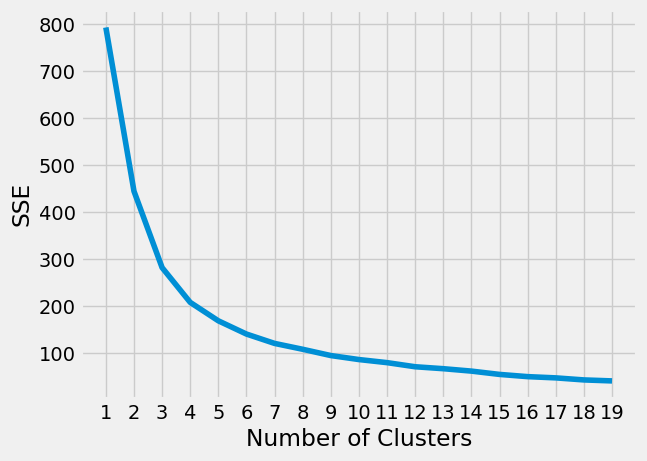

In [234]:

plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

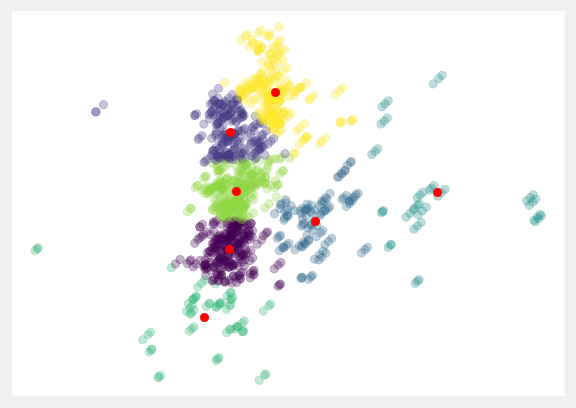

In [240]:
kmeans = KMeans(n_clusters=7).fit(data_to_fit)
centroids = kmeans.cluster_centers_
ax = plt.axes()
ax.set_facecolor("white")
ax.set_xticks([])
ax.set_yticks([])
plt.scatter(data_to_fit['x'], data_to_fit['y'], 
            c=kmeans.labels_.astype(float), alpha=0.3)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()